<a href="https://colab.research.google.com/github/GARAM-SHIN/2025-1_CV/blob/main/HW%234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lecture 5 : Recognition**

##**Object Detection 실습 구현 - YOLOv5, COCO**


In [ ]:
# YOLOv5 저장소 클론 및 환경 설
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 17488 (delta 0), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17488/17488), 16.55 MiB | 9.19 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:

In [ ]:
# COCO128 데이터셋 다운로드
!curl -L "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -o coco128.zip
!unzip coco128.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  7599k      0 --:--:-- --:--:-- --:--:-- 23.6M
Archive:  coco128.zip
   creating: coco128/
  inflating: coco128/LICENSE         
   creating: coco128/images/
   creating: coco128/images/train2017/
  inflating: coco128/images/train2017/000000000612.jpg  
  inflating: coco128/images/train2017/000000000404.jpg  
  inflating: coco128/images/train2017/000000000438.jpg  
  inflating: coco128/images/train2017/000000000389.jpg  
  inflating: coco128/images/train2017/000000000564.jpg  
  inflating: coco128/images/train2017/000000000149.jpg  
  inflating: coco128/images/train2017/000000000605.jpg  
  inflating: coco128/images/train2017/000000000349.jpg  
  inflating: coco128/images/train2017/000000000201.jpg  
  inflating: coco128/

In [ ]:
# 학습 실행
!python train.py --img 640 --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt --project ./runs/train --name my_yolo_exp

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-12 02:53:59.638183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749696839.941899    1268 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749696840.022262    1268 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
# 학습 결과 파일이 저장된 디렉터리의 파일 목록 출력
!ls -l runs/train/my_yolo_exp/

total 12084
-rw-r--r-- 1 root root  552965 Jun 12 02:58 confusion_matrix.png
-rw-r--r-- 1 root root 3107035 Jun 12 02:58 events.out.tfevents.1749696875.41da946a4e16.1268.0
-rw-r--r-- 1 root root  830034 Jun 12 02:58 F1_curve.png
-rw-r--r-- 1 root root     373 Jun 12 02:54 hyp.yaml
-rw-r--r-- 1 root root  211515 Jun 12 02:54 labels_correlogram.jpg
-rw-r--r-- 1 root root  245726 Jun 12 02:54 labels.jpg
-rw-r--r-- 1 root root    1140 Jun 12 02:54 opt.yaml
-rw-r--r-- 1 root root  622702 Jun 12 02:58 P_curve.png
-rw-r--r-- 1 root root  155300 Jun 12 02:58 PR_curve.png
-rw-r--r-- 1 root root  568832 Jun 12 02:58 R_curve.png
-rw-r--r-- 1 root root   14994 Jun 12 02:58 results.csv
-rw-r--r-- 1 root root  346614 Jun 12 02:58 results.png
-rw-r--r-- 1 root root  676061 Jun 12 02:54 train_batch0.jpg
-rw-r--r-- 1 root root  722857 Jun 12 02:54 train_batch1.jpg
-rw-r--r-- 1 root root  687013 Jun 12 02:54 train_batch2.jpg
-rw-r--r-- 1 root root  508241 Jun 12 02:58 val_batch0_labels.jpg
-rw-r--r-- 1 

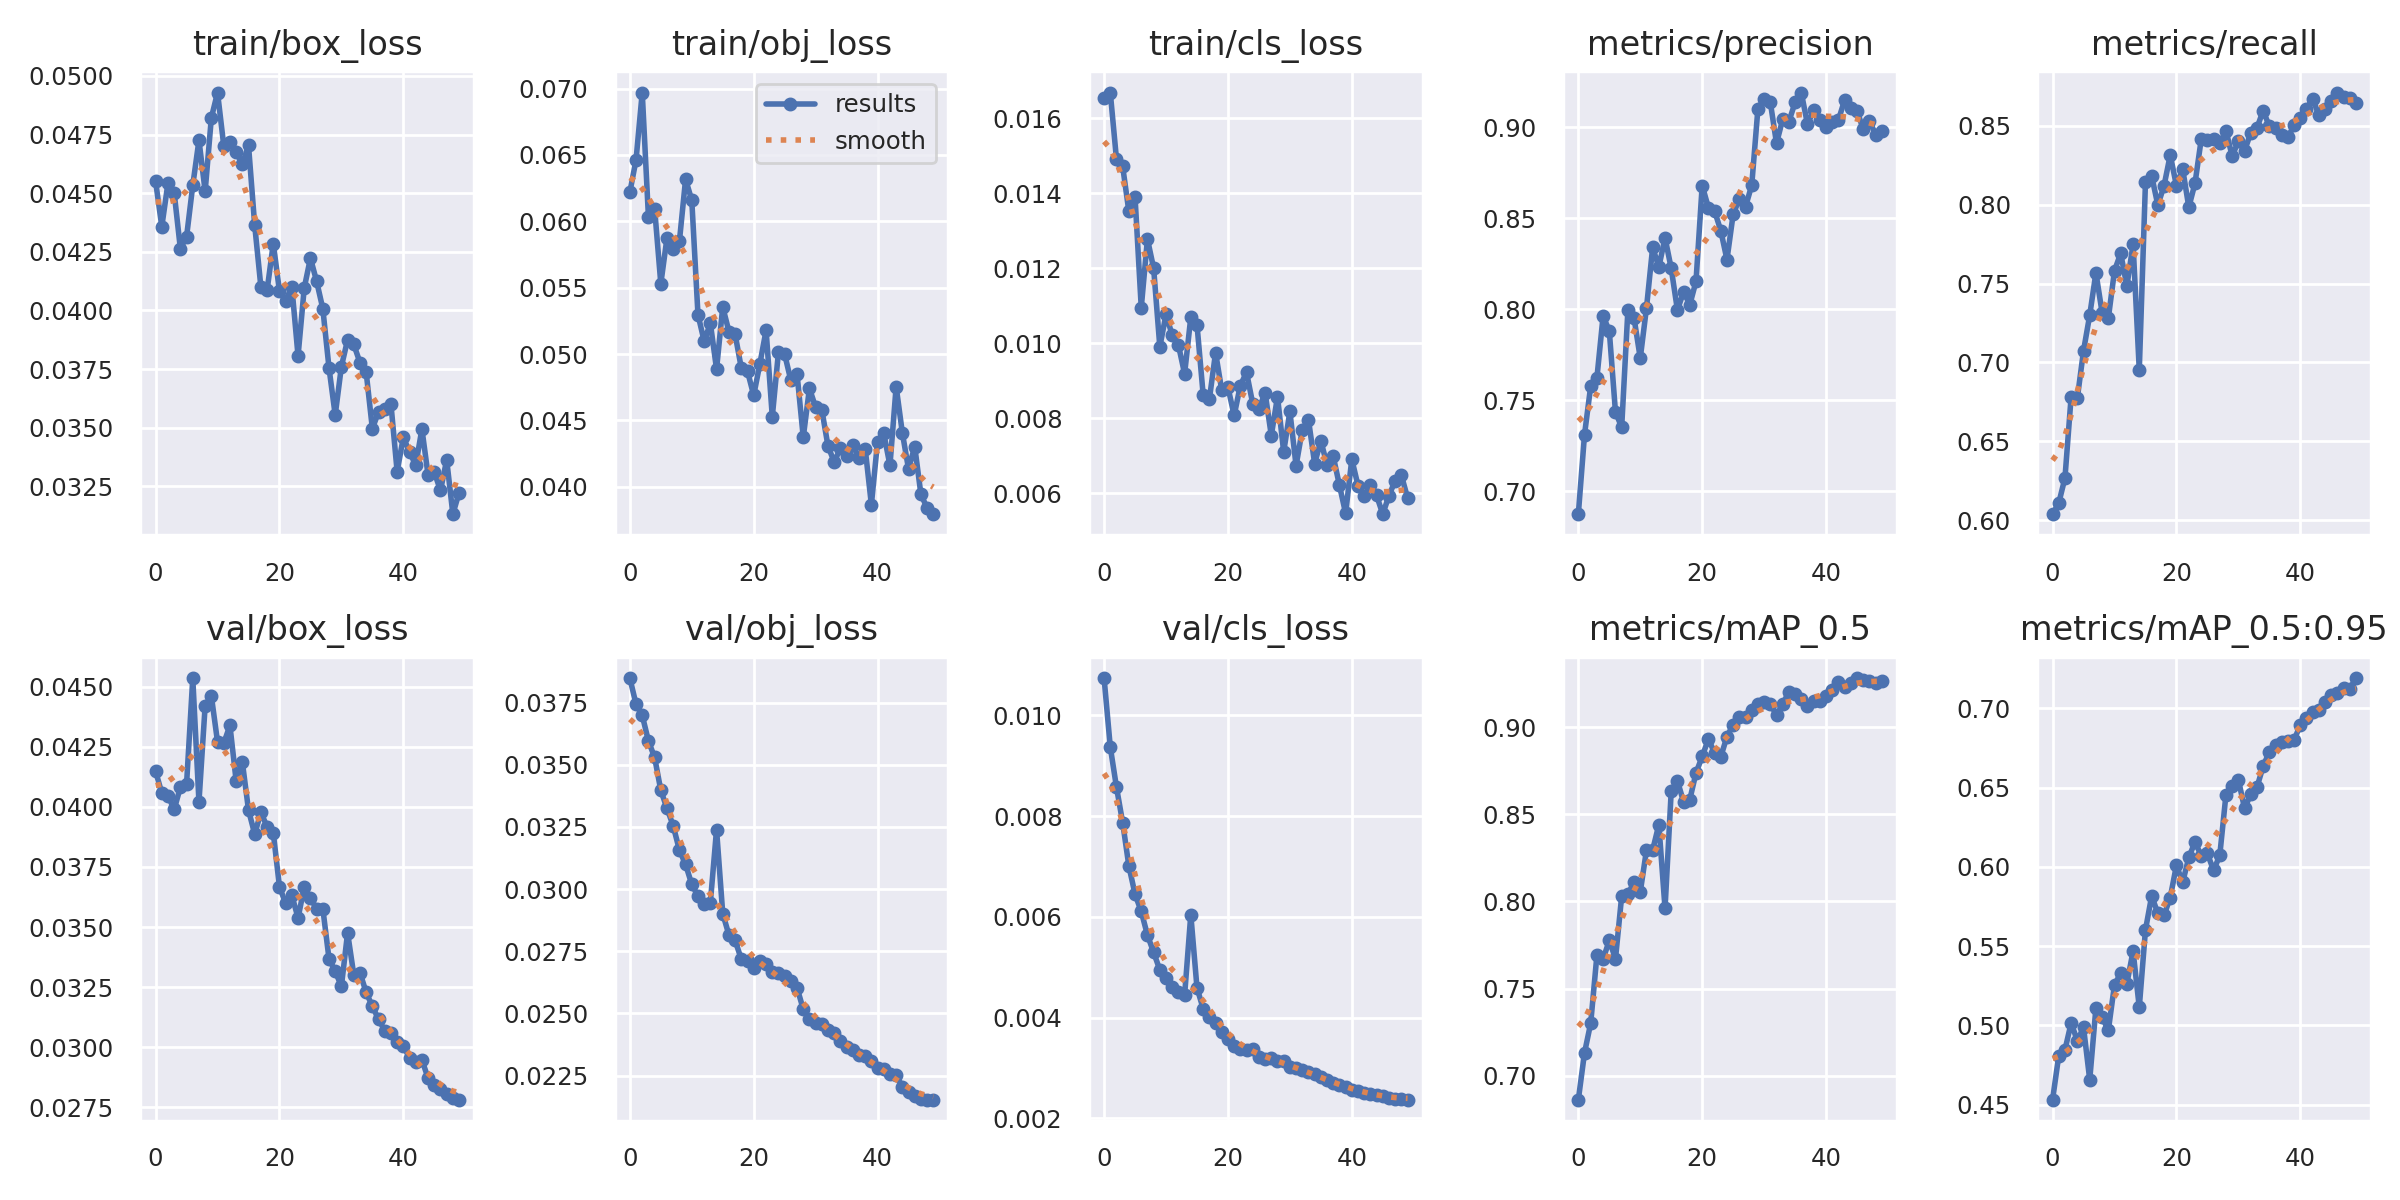

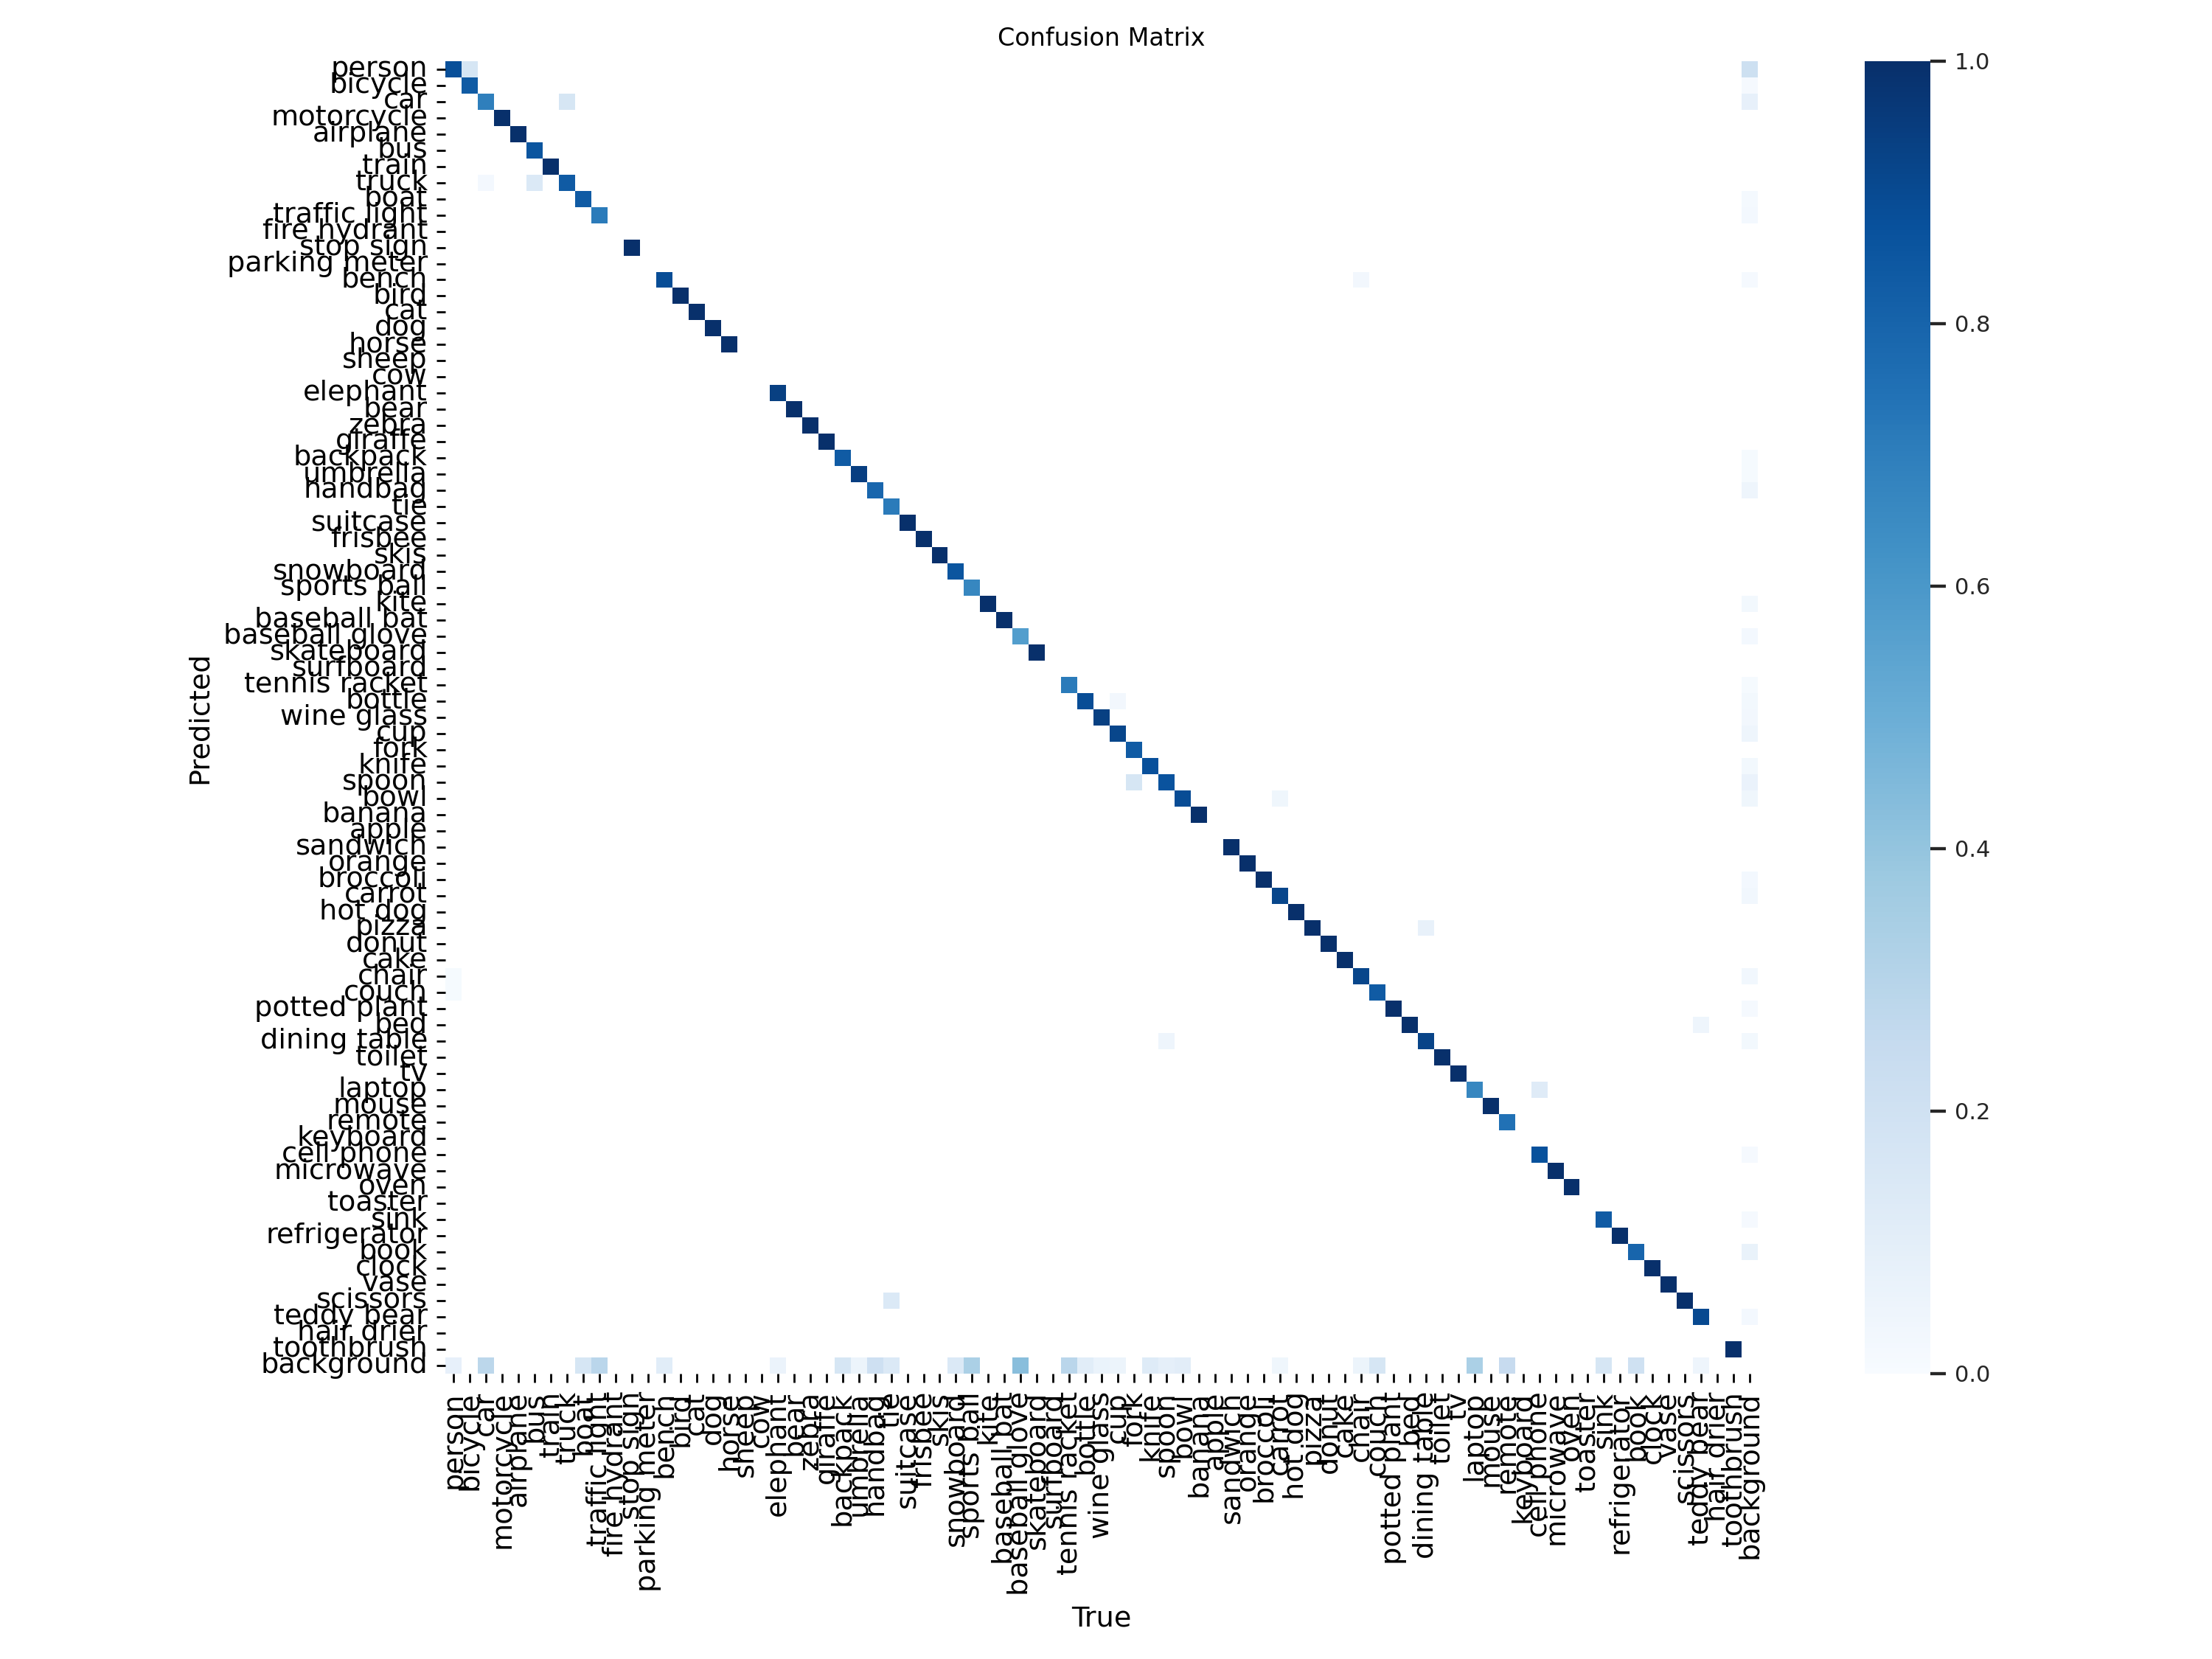

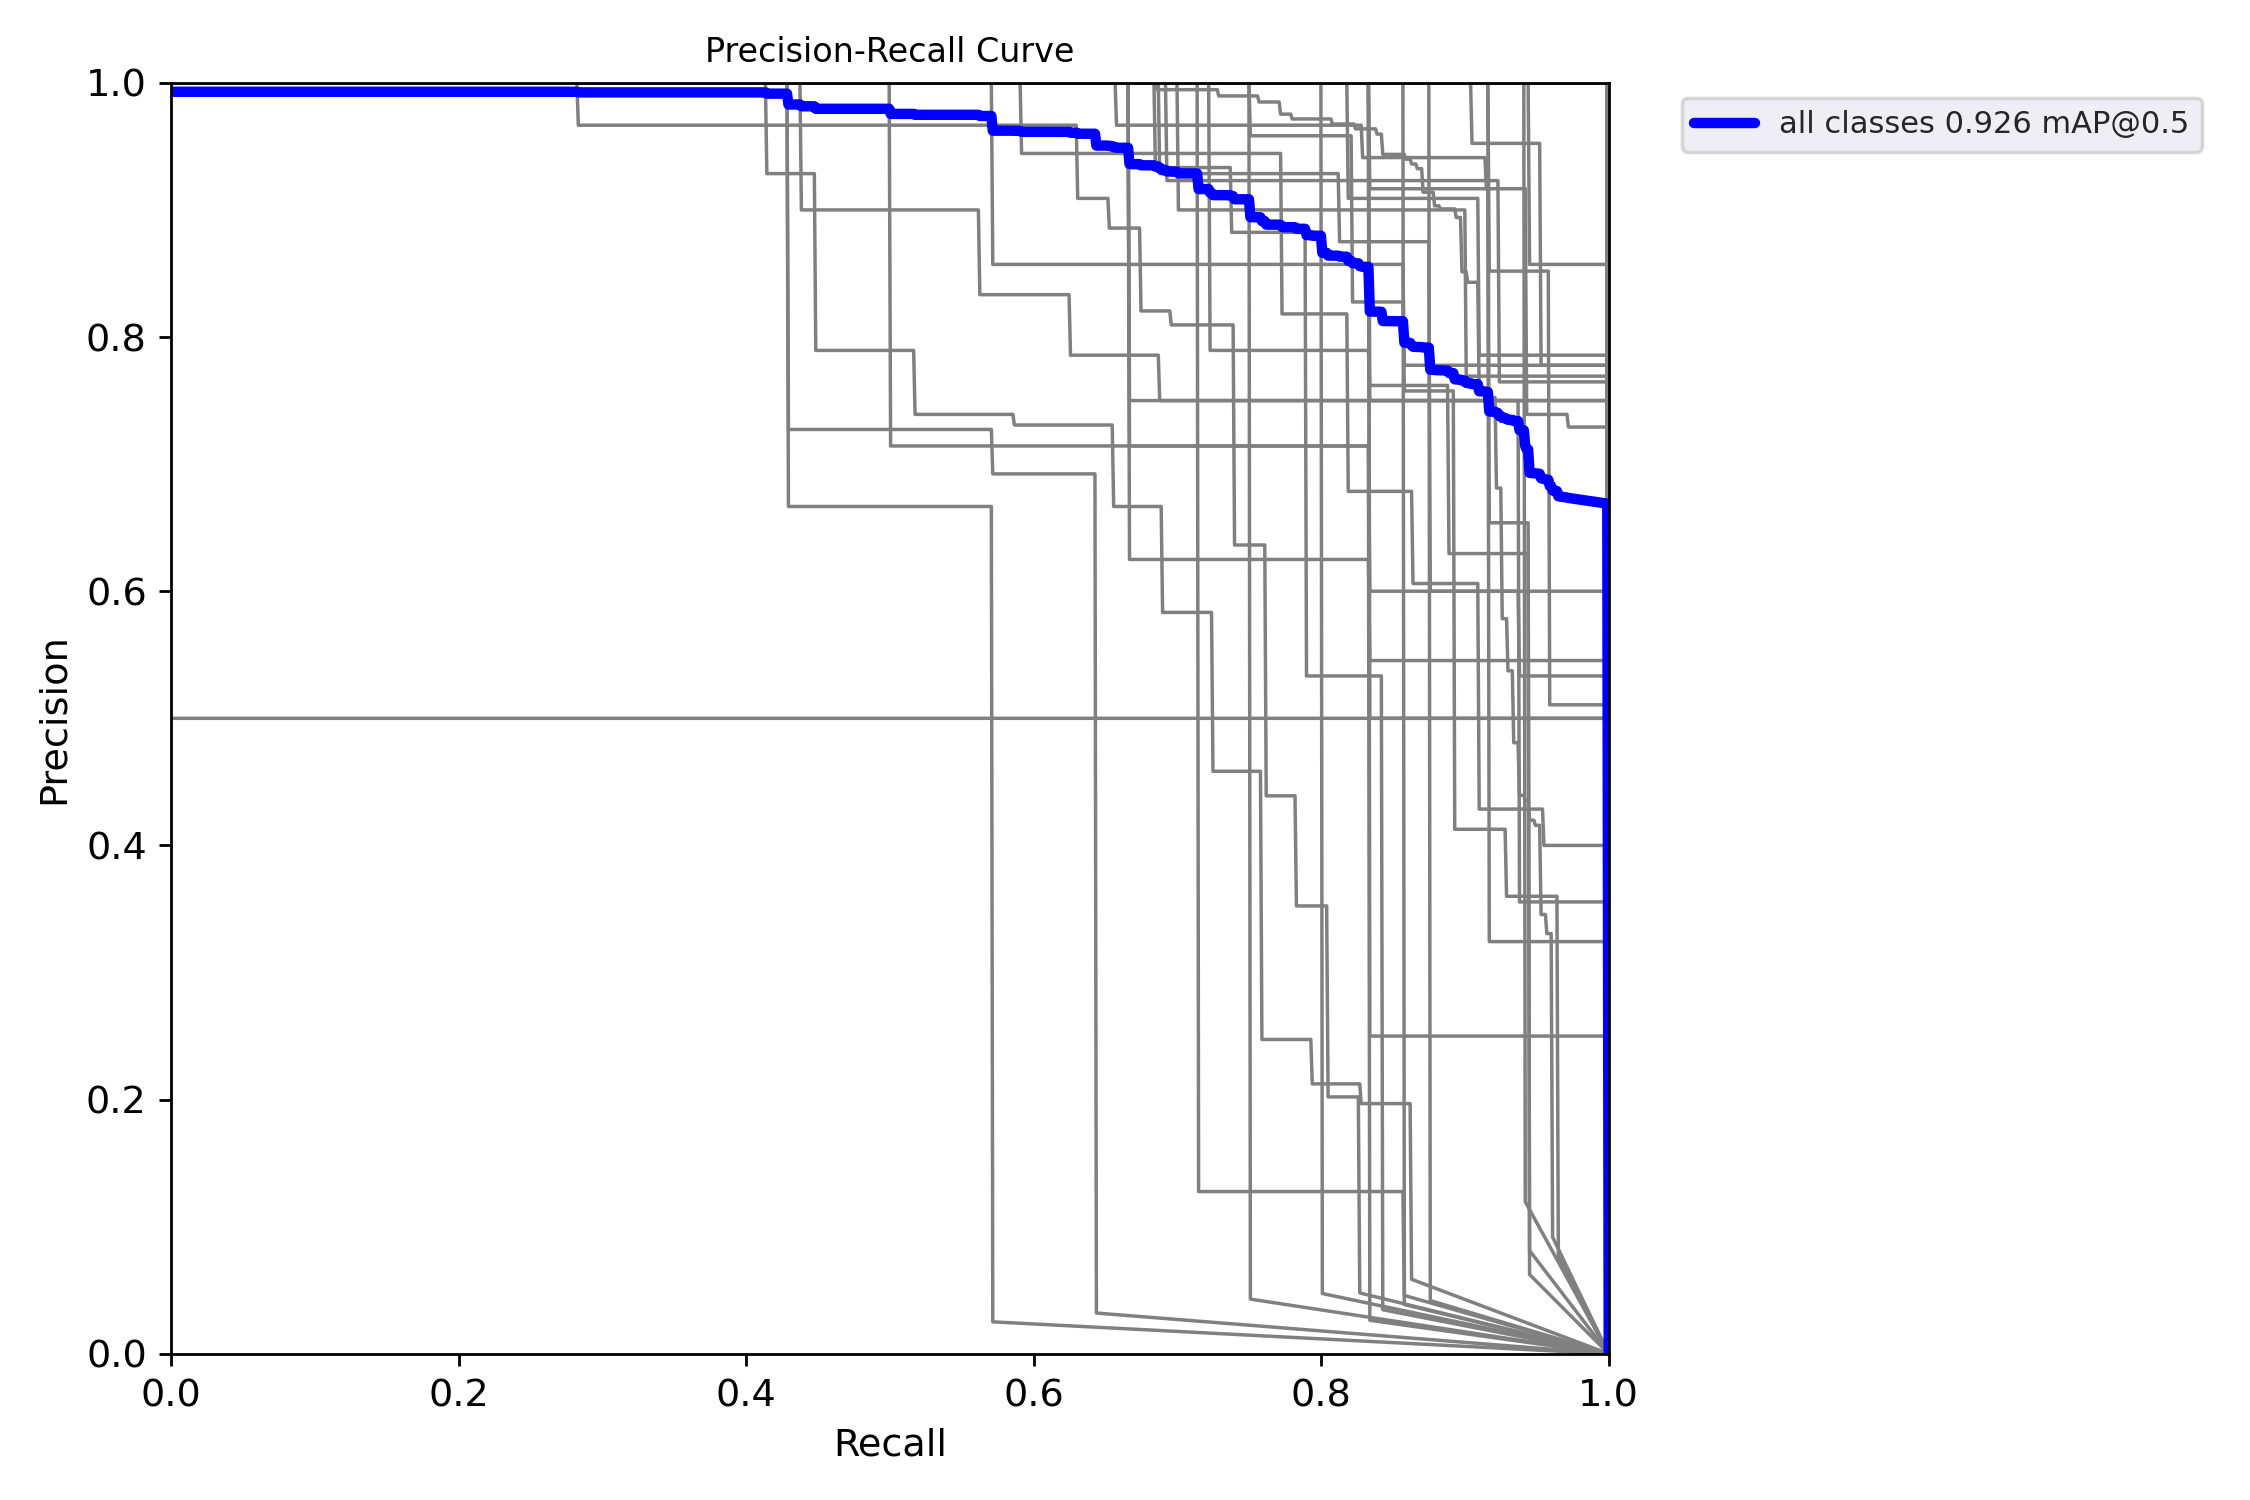

In [ ]:
# 모델 성능 결과 시각화 이미지로 출력
from IPython.display import Image, display
display(Image(filename='runs/train/my_yolo_exp/results.png'))  # 학습 결과 그래프 (loss, precision 등)
display(Image(filename='runs/train/my_yolo_exp/confusion_matrix.png'))  # 클래스별 Confusion Matrix
display(Image(filename='runs/train/my_yolo_exp/PR_curve.png'))  # Precision-Recall Curve - Note the capital 'PR'

In [ ]:
# 테스트 이미지 추론
!python detect.py --weights runs/train/my_yolo_exp/weights/best.pt --img 640 --source data/images

detect: weights=['runs/train/my_yolo_exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 44.5ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 29.9ms
Speed: 0.5ms pre-process, 37.2ms inference, 67.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


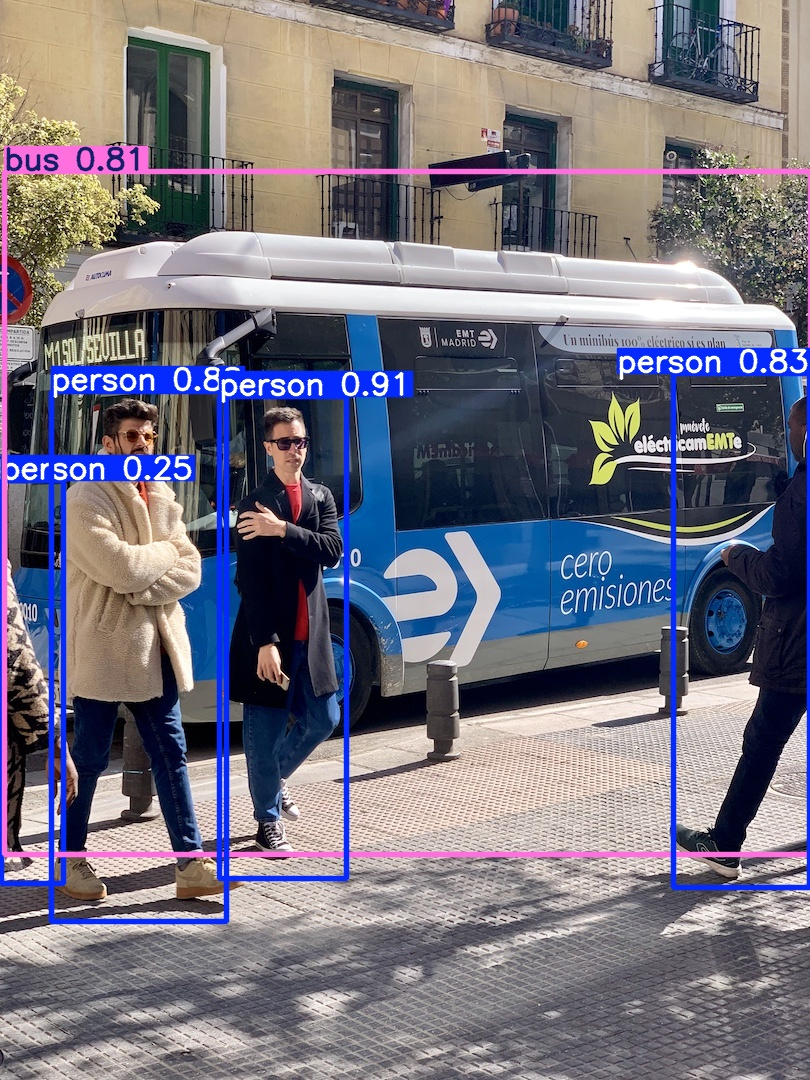

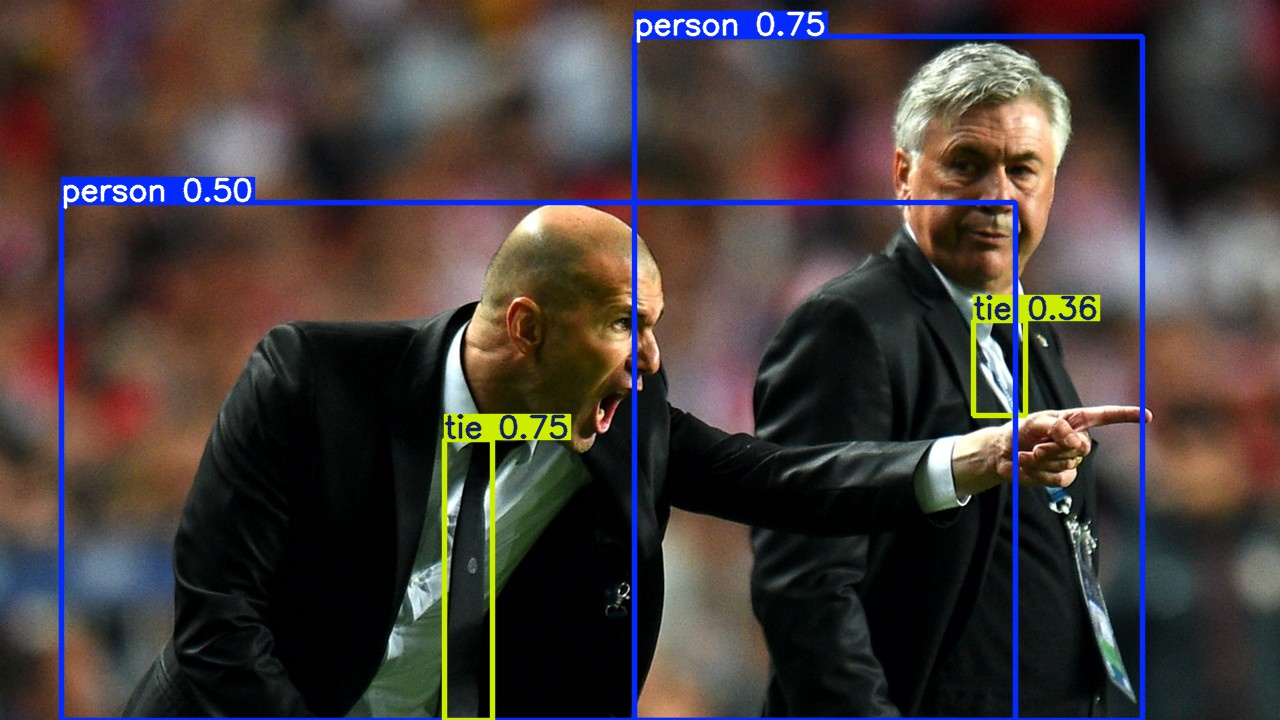

In [ ]:
# 추론 결과 이미지 확인
import glob
from IPython.display import Image

result_images = glob.glob('runs/detect/exp/*.jpg')
for img_path in result_images:
    display(Image(filename=img_path))